<a href="https://colab.research.google.com/github/Dotto-Luis/CoderHouse-Challenges/blob/main/Visualizaciones_Dotto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
from google.colab import drive
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

#1.Cargar este archivo en Python. Realizar estadísticas descriptivas básicas


In [6]:
drive.mount('/content/gdrive/') #permitimos acceso al drive\n"
path = '/content/gdrive/MyDrive/Colab Notebooks/04.Visualizaciones/HRDataset_v14.csv' #asigno la ruta a una variable\n"
df = pd.read_csv(path, sep = ',', encoding='iso-8859-1') #leemos el archivo
df.head(3) #mostramos solo las 3 primeras filas

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


,ï»¿Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3


In [7]:
type(df.Salary[0])

numpy.int64

In [8]:
df.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


#2. Realizar un histograma con los salarios. Qué rango(s) de salarios son los más populares?

In [42]:
d = df.Salary
d

GenderID
1     62506
1    104437
0     64955
0     64991
0     50825
      ...  
1     65893
0     48513
0    220450
0     89292
0     45046
Name: Salary, Length: 311, dtype: int64

In [43]:
d.values.flatten()

array([ 62506, 104437,  64955,  64991,  50825,  57568,  95660,  59365,
        47837,  50178,  54670,  47211,  92328,  58709,  52505,  57834,
        70131,  59026, 110000,  53250,  51044,  64919,  62910,  66441,
        57815, 103613, 106367,  74312,  53492,  63000,  65288,  64375,
        74326,  63763,  62162,  77692,  72640,  93396,  52846, 100031,
        71860,  61656, 110929,  54237,  60380,  66808,  64786,  64816,
        68678,  64066,  59369,  50373,  63108,  59144,  68051, 170500,
        63381,  83552,  56149,  92329,  65729,  85028,  57583,  56294,
        56991,  55722, 101199,  61568,  58275,  53189,  96820,  51259,
        59231,  61584,  46335,  70621, 138888,  74241,  75188,  62514,
        60070,  48888,  54285,  56847,  60340,  59124,  99280,  71776,
        65902,  57748,  64057,  53366,  58530,  72609,  55965,  70187,
       178000,  99351,  67251,  65707,  52249,  53171,  51337,  51505,
        59370,  54933,  57815,  61555, 114800,  74679,  53018,  59892,
      

Text(0.5, 0, 'Intervalos de Salarios')

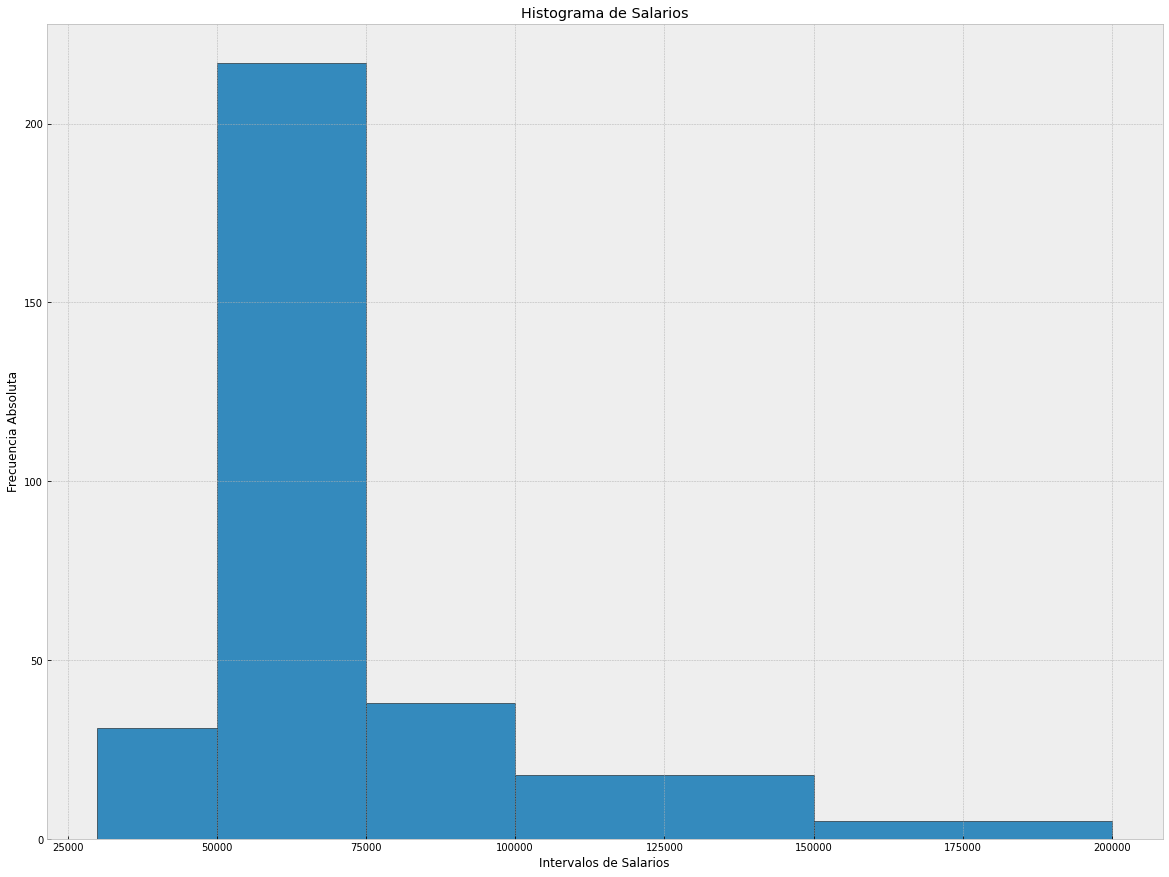

In [72]:
plt.style.use('bmh')
bins=[30000,50000,75000,100000,150000,200000]
fig, ax = plt.subplots(figsize = (20,15))
ax.hist(d.values.flatten(), bins=bins, edgecolor='black')
ax.set_title('Histograma de Salarios')
ax.set_ylabel('Frecuencia Absoluta')
ax.set_xlabel('Intervalos de Salarios')

## Los rangos de salarios mas populares van de 50.000 a 75.000

#3. Realizar un gráfico de violín con los salarios, discriminados por género.

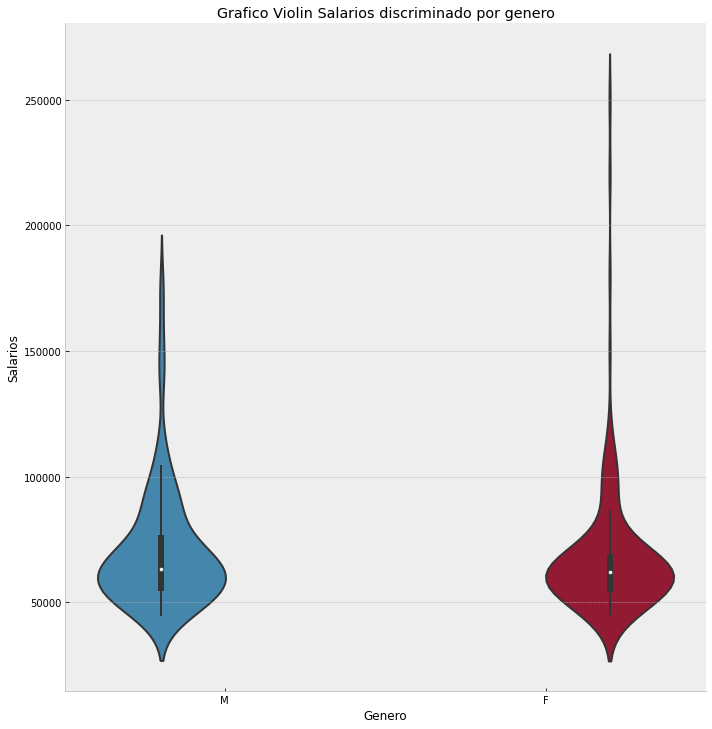

In [93]:
ax = sns.catplot(data=df, kind='violin',y='Salary',x='Sex',hue='Sex',split=False,height=10)
ax.set(xlabel='Genero', ylabel='Salarios', title='Grafico Violin Salarios discriminado por genero')

#4. Graficar la serie de tiempo correspondiente a la fecha de contratación (DateofHire)

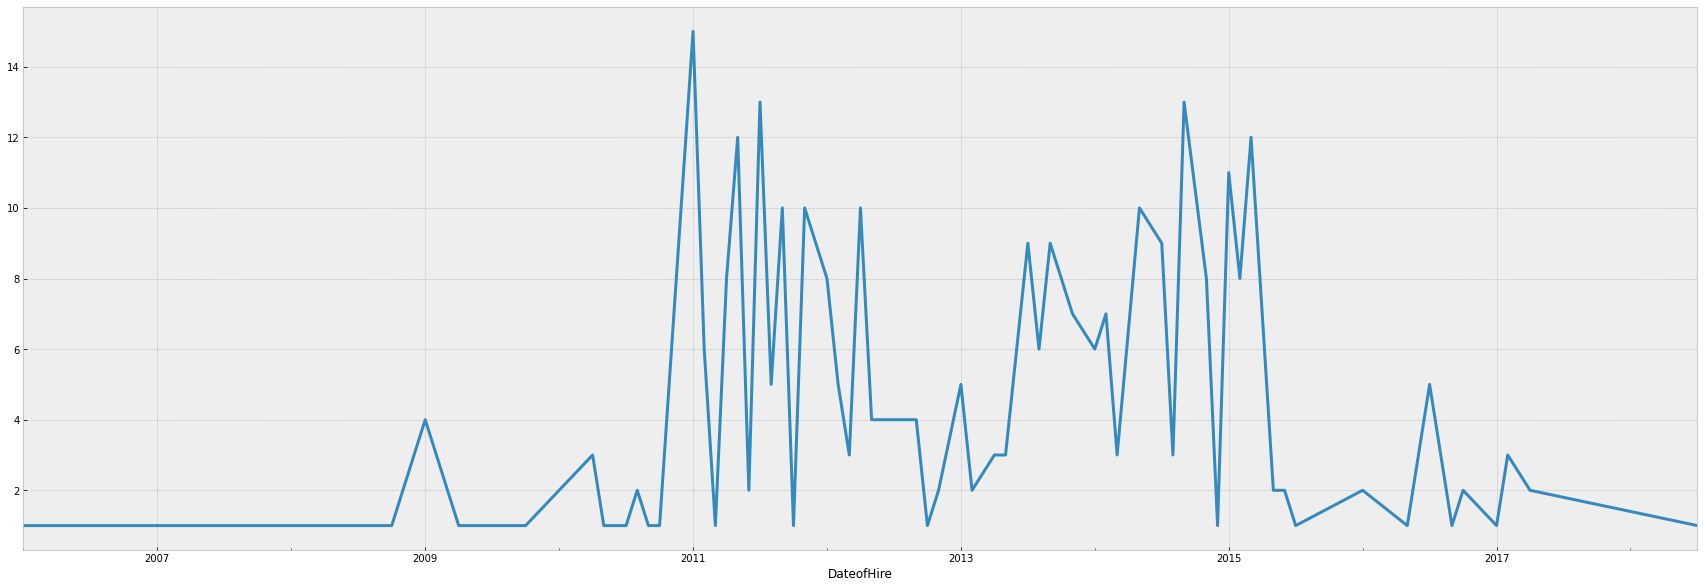

In [112]:
df['DateofHire']=pd.to_datetime(df['DateofHire'])
monthly_hire = df.groupby(df['DateofHire'].dt.to_period('M')).size()
plt.figure(figsize=(30,10))
monthly_hire.plot.line(linewidth=3)